### Carol Chiu
### April 21, 2020
# Sentiment Analysis 
####Reddit is doing an analysis where they try to track user subscription based on the readers’ sentiments in posts. They know how many people subscribe to the posts but they lack the means to extract text language and manipulate the text to interpret its meaning. As such, they are asking us to help determine how the viewers perceive the posts on their website so that they can determine a relationship, if there exists, between subscription and viewer sentiment on posts.

In [ ]:
#Import packages 

import requests 
import pandas as pd 

In [18]:
#Obtain text data from Reddit 
url1='https://www.reddit.com/r/Naruto/comments/91pmf2/is_sasuke_stronger_than_naruto.json'
res = requests.get('https://www.reddit.com/r/Naruto/comments/91pmf2/is_sasuke_stronger_than_naruto.json', headers={'User-agent': 'Naruto project'}) 

json = res.json() 

json 

[{'kind': 'Listing',
  'data': {'modhash': '',
   'dist': 1,
   'children': [{'kind': 't3',
     'data': {'approved_at_utc': None,
      'subreddit': 'Naruto',
      'selftext': "I get that Naruto has a LOT more chakra than Sasuke however I feel like Sasuke's jutsu is far more lethal. For instance, isn't the rinnegans soul grab jutsu an instant death for Naruto. Also, how will Naruto cope with Amerterasu if he's in mid air and can't dodge it for instance. Sasuke's chibaku tensei restrained all the tailed beasts so how can we know if naruto could destroy Sasuke's chibaku tensei. Lastly, while this has never been shown but can't sasuke take control of the Kyuubi through his Sharingan? Naruto has immense power but most of the techniques he chooses to use are not the instant killing type. eg Chidori pierces, Rasengan hits hard like a punch, Sasuke uses kenjutsu, Naruto only uses taijutsu etc. What do you guys think?",
      'user_reports': [],
      'saved': False,
      'mod_reason_title'

In [19]:
res_2 = requests.get('https://www.reddit.com/r/Naruto/comments/94tylq/who_is_stronger_adult_naruto_or_adult_sasuke.json',headers={'User-agent': 'Naruto project'}) 

json2 = res_2.json() 

In [20]:
res_3 = requests.get('https://www.reddit.com/r/Naruto/comments/8nbou4/why_do_people_still_try_to_argue_that_sasuke_is.json', headers={'User-agent': 'Naruto project'} ) 

json3 = res_3.json() 

In [21]:
res_4 = requests.get('https://www.reddit.com/r/Naruto/comments/7l3tzk/naruto_is_stronger_than_sasuke.json', headers={'User-agent': 'Naruto project'}) 

json4 = res_4.json() 

In [22]:
#For the first Reddit post, search through the dictionaries within the main dictionary one at a time 

json[0] 

json[0]['data'] 

json[0]['data']['children'] 

text1 = json[0]['data']['children'][0]['data']['selftext'] 

text1 

"I get that Naruto has a LOT more chakra than Sasuke however I feel like Sasuke's jutsu is far more lethal. For instance, isn't the rinnegans soul grab jutsu an instant death for Naruto. Also, how will Naruto cope with Amerterasu if he's in mid air and can't dodge it for instance. Sasuke's chibaku tensei restrained all the tailed beasts so how can we know if naruto could destroy Sasuke's chibaku tensei. Lastly, while this has never been shown but can't sasuke take control of the Kyuubi through his Sharingan? Naruto has immense power but most of the techniques he chooses to use are not the instant killing type. eg Chidori pierces, Rasengan hits hard like a punch, Sasuke uses kenjutsu, Naruto only uses taijutsu etc. What do you guys think?"

In [23]:
#For the other three Reddit posts, you will need to loop through the list of dictionaries. 

len(json2) 

json2[1].keys 

json2[1]['data']['children'][0]['data'] 

json2[1]['data']['children'] 

[{'kind': 't1',
  'data': {'total_awards_received': 0,
   'approved_at_utc': None,
   'ups': 20,
   'awarders': [],
   'mod_reason_by': None,
   'banned_by': None,
   'author_flair_type': 'text',
   'removal_reason': None,
   'link_id': 't3_94tylq',
   'author_flair_template_id': None,
   'likes': None,
   'replies': {'kind': 'Listing',
    'data': {'modhash': '',
     'dist': None,
     'children': [{'kind': 't1',
       'data': {'total_awards_received': 0,
        'approved_at_utc': None,
        'ups': -9,
        'awarders': [],
        'mod_reason_by': None,
        'banned_by': None,
        'author_flair_type': 'text',
        'removal_reason': None,
        'link_id': 't3_94tylq',
        'author_flair_template_id': None,
        'likes': None,
        'replies': {'kind': 'Listing',
         'data': {'modhash': '',
          'dist': None,
          'children': [{'kind': 't1',
            'data': {'total_awards_received': 0,
             'approved_at_utc': None,
             'up

In [24]:
#List indices must be integers not strings. 

text2 = [each['data']['body'] for each in json2[1]['data']['children']] 

text2 

 

text3 = [each['data']['body'] for each in json3[1]['data']['children']] 

text3 

 

text4 = [each['data']['body'] for each in json4[1]['data']['children']] 

text4 

["Kishimoto wants them to be equal. Doesn't matter how we rationalize it. If they fought again, something, somehow in someway, Kishimoto would write their battle so that they'll stalemate again and again and again.",
 'Enough this this pointless bs, they are equal. Sasuke will always have his Rinnegan abilities to work around the greater chakra Naruto has if he needs to.\n\nAnd they were pretty damn equal in fight against Momoshiki anyway. If they continue to be depicted as equal time and time again in every possible way, they are equal. Why there is always some guy who feels the need to keep arguing such a dumb, already fully decided topic is beyond me ',
 "None of what you said matter since kishimoto is still going to have those two tie or be around the same power level. Naruto gained kcm then after a while also added sage mode on top of it and other characters was still able to keep up with him in speed and stamina, nagato is a prime example of this (naruto can run circles around th

In [25]:
#We want to obtain a list of comments next 

comments = [text1] + text2 + text3 + text4 

total_data = pd.DataFrame(comments) 

total_data.head() 

,0
0,I get that Naruto has a LOT more chakra than S...
1,It will always end in a tie. Take from that wh...
2,It doesnt matter and from their final battle i...
3,"Some will say Sasuke, others say Naruto. Who e..."
4,"Based on the final fight, Naruto bc he wasn't ..."


In [26]:
#Rename column name 

total_data.columns = ['text'] 

total_data.head(3)

,text
0,I get that Naruto has a LOT more chakra than S...
1,It will always end in a tie. Take from that wh...
2,It doesnt matter and from their final battle i...


In [27]:
#View each entry under text in Reddit posts 

total_data['text']

0     I get that Naruto has a LOT more chakra than S...
1     It will always end in a tie. Take from that wh...
2     It doesnt matter and from their final battle i...
3     Some will say Sasuke, others say Naruto. Who e...
4     Based on the final fight, Naruto bc he wasn't ...
5                                               Naruto 
6                                         They're equal
7                                           Naruto duh.
8     I think Naruto only because he has a little mo...
9                                        I think Naruto
10                                               naruto
11    Naruto is stronger. They’re equal in strength ...
12    Author said they were equal.  Anyways, Naruto ...
13    Because everyone wants their fave to be stronger 
14     I'll do you better one  why is Naruto stronge...
15    They're pretty equal.  We've seen time and tim...
16    I have no idea. Naruto tied with Sasuke in the...
17    I wish people would stop mixing up Human P

In [28]:
#Import package for “Sentiment Analysis” 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/carolwinchiu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
#Create and run object with sentiment intensity analyzer 

sia = SentimentIntensityAnalyzer() 

sentiments = [sia.polarity_scores(each) for each in comments] 

In [30]:
#Place final result into a DataFrame 

final = pd.DataFrame(sentiments) 

total_data.shape 

new_final = pd.concat([final, total_data['text']], axis = 1) 

new_final.head() 

,neg,neu,pos,compound,text
0,0.046,0.880,0.074,0.7035,I get that Naruto has a LOT more chakra than S...
1,0.000,1.000,0.000,0.0000,It will always end in a tie. Take from that wh...
2,0.149,0.851,0.000,-0.3968,It doesnt matter and from their final battle i...
3,0.000,1.000,0.000,0.0000,"Some will say Sasuke, others say Naruto. Who e..."
4,0.143,0.770,0.087,-0.4700,"Based on the final fight, Naruto bc he wasn't ..."


In [31]:
#Sort analysis values by order 

new_final.sort_values(by='neg', ascending = False).head(20) 

new_final.sort_values(by='pos', ascending = False).head(20) 

new_final.describe()

,neg,neu,pos,compound
count,36.000000,36.000000,36.000000,36.000000
mean,0.062722,0.814361,0.122917,0.010847
std,0.081384,0.213117,0.199770,0.500128
min,0.000000,0.192000,0.000000,-0.965200
25%,0.000000,0.764250,0.000000,-0.255800
50%,0.023000,0.844500,0.056500,0.000000
75%,0.118500,1.000000,0.127000,0.409825
max,0.341000,1.000000,0.808000,0.902700



Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Text(0.5, 1.0, 'How Do the People Feel?')

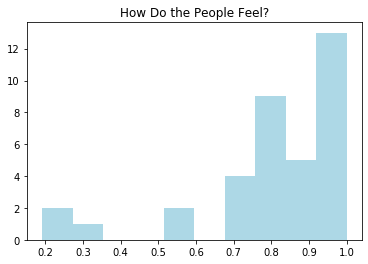

In [32]:
#Plot Sentiment Distributions 
import matplotlib.pyplot as plt 

plt.hist(new_final['neu'], color = 'lightblue') 

plt.title("How Do the People Feel?", color = 'black') 

Text(0.5, 1.0, 'How Do the People Feel?')

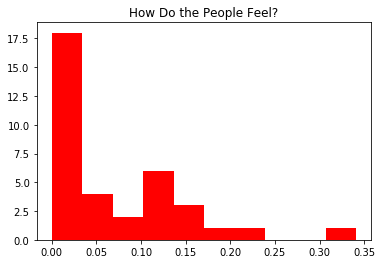

In [33]:
plt.hist(new_final['neg'], color = 'red') 

plt.title("How Do the People Feel?", color = 'black') 

Text(0.5, 1.0, 'How Do the People Feel?')

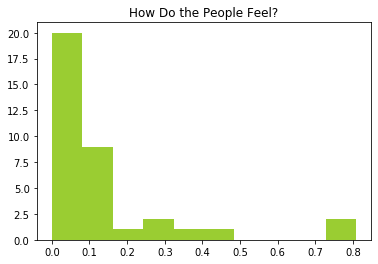

In [34]:
plt.hist(new_final['pos'], color = 'yellowgreen') 

plt.title("How Do the People Feel?", color = 'black') 

####Overall, the viewes feel neutral about the posts "Who is Stronger, Sasuke or Naruto?" from the Naruto and Boruto subreddits.